<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/%20notebooks/tsa_stlf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install --upgrade statsmodels &> /dev/null

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace import exponential_smoothing 

In [4]:
rng = np.random.default_rng(123)

In [5]:
n = 1_000
t = pd.date_range(start="2022-01-01", periods=n)
x = pd.Series(rng.standard_normal(n), index=t)
idx = np.abs((np.arange(n) % 100) - 20) <= 4
x[idx] = np.round(rng.normal(10, 2, np.sum(idx)))

In [16]:
# ES = exponential_smoothing.ExponentialSmoothing
stlf = STLForecast(x, ES, model_kwargs={"trend": True, "seasonal": 10}) 
# stlf = STLForecast(x, ARIMA, model_kwargs={"order": (3, 2, 1)})
res = stlf.fit()
forecasts = res.forecast(200)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/exponential_smoothing.py:165: RuntimeWarning: ExponentialSmoothing should not be used with seasonal terms. It has a serious bug that has not been fixed. Instead use ETSModel.
  RuntimeWarning


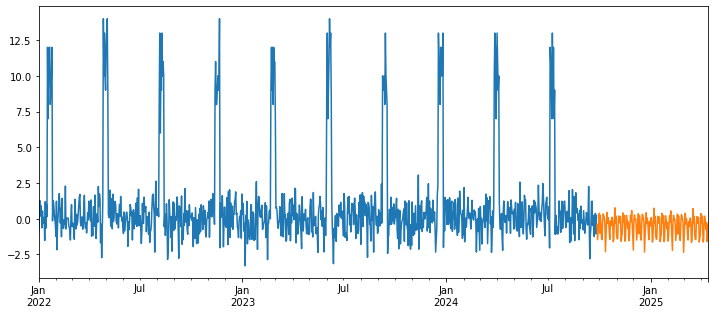

In [17]:
plt.figure(figsize=(12, 5))
x.plot()
forecasts.plot()
plt.show()

In [19]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("forecast")

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



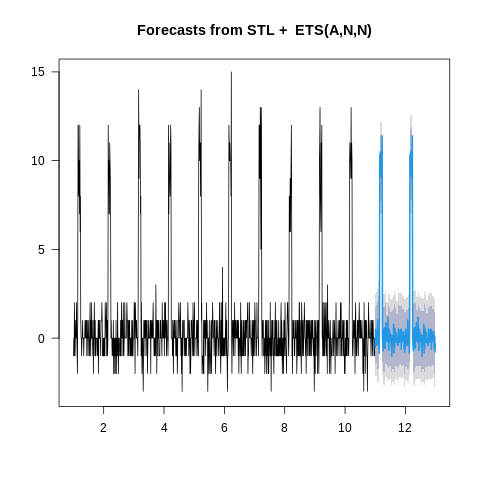

In [20]:
%%R
set.seed(1)
series <- ts(round(rnorm(1000)),frequency=100)
index <- abs((seq_along(series)%%100)-20) <= 4
series[index] <- round(rnorm(sum(index),10,2))

library(forecast)
model <- stlf(series)
plot(forecast(model,h=200),las=1)